---
## Árvore de decisão - dados 2010 a 2017 - modelo 2
---


## Análise exploratória dos dados

In [1]:
# Importar bibliotecas pandas, plot_confusion_matrix, train_test_split, matplotlib
import pandas as pd
# from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
!pip install treeinterpreter scikit-learn
from treeinterpreter import treeinterpreter as ti

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.float_format', '{:,.2f}'.format)
sns.set_theme(style="white", palette="deep", context="talk",font_scale=0.8)
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:

object_columns = ['Protocolo_S2iD', 'Nome_Municipio', 'Sigla_UF', 'regiao',
                  'Setores Censitários', 'Status', 'DH_Descricao', 'DM_Descricao',
                  'DA_Descricao', 'DA_Polui/cont da água', 'DA_Polui/cont do ar',
                  'DA_Polui/cont do solo', 'DA_Dimi/exauri hídrico',
                  "DA_Incêndi parques/APA's/APP's", 'PEPL_Descricao', 'PEPR_Descricao',
                  'Categoria', 'Grupo', 'Subgrupo', 'Tipo', 'Subtipo']

dtype = {col: 'object' for col in object_columns}

In [5]:
df_eventos_2010_2 = pd.read_csv(
    "https://raw.githubusercontent.com/brunagmoura/PrevisorReconhecimento/refs/heads/main/df_eventos_2010_2017_modelo2.csv",
    sep=';',
    decimal=',')



In [6]:
#df_eventos_2010_2.head(5)
#print(df_eventos_2010_2.info())

In [7]:
df_eventos_2010_2.dtypes.reset_index().rename(columns={0: '.dtype', 'index': 'Variável'})

,Variável,.dtype
0,Status,int64
1,DH_MORTOS,int64
2,DH_FERIDOS,int64
3,DH_ENFERMOS,int64
4,DH_DESABRIGADOS,int64
5,DH_DESALOJADOS,int64
6,DH_DESAPARECIDOS,int64
7,DH_OUTROS AFETADOS,int64
8,DM_Uni Habita Danificadas,int64
9,DM_Uni Habita Destruidas,int64


In [8]:
## Mostra número de valores nulos no dataset
#df_eventos_2010_2.isna().sum()

In [9]:
# Verifica balanceamento das classses (value_counts())
print(df_eventos_2010_2['Status'].value_counts())

Status
0    11814
1     1233
Name: count, dtype: int64


In [10]:
## Atribuir valores para X e y, sendoque y será correspondete à variável 'Status'
X, y = df_eventos_2010_2.drop('Status', axis=1), df_eventos_2010_2['Status']
#print(y)


In [11]:
# # Cria X com as features codificadas com ".get_dummies" do Pandas.
# X_dummies = pd.get_dummies(df_eventos_2018_1.iloc[:,:-1])
# X_dummies.head()

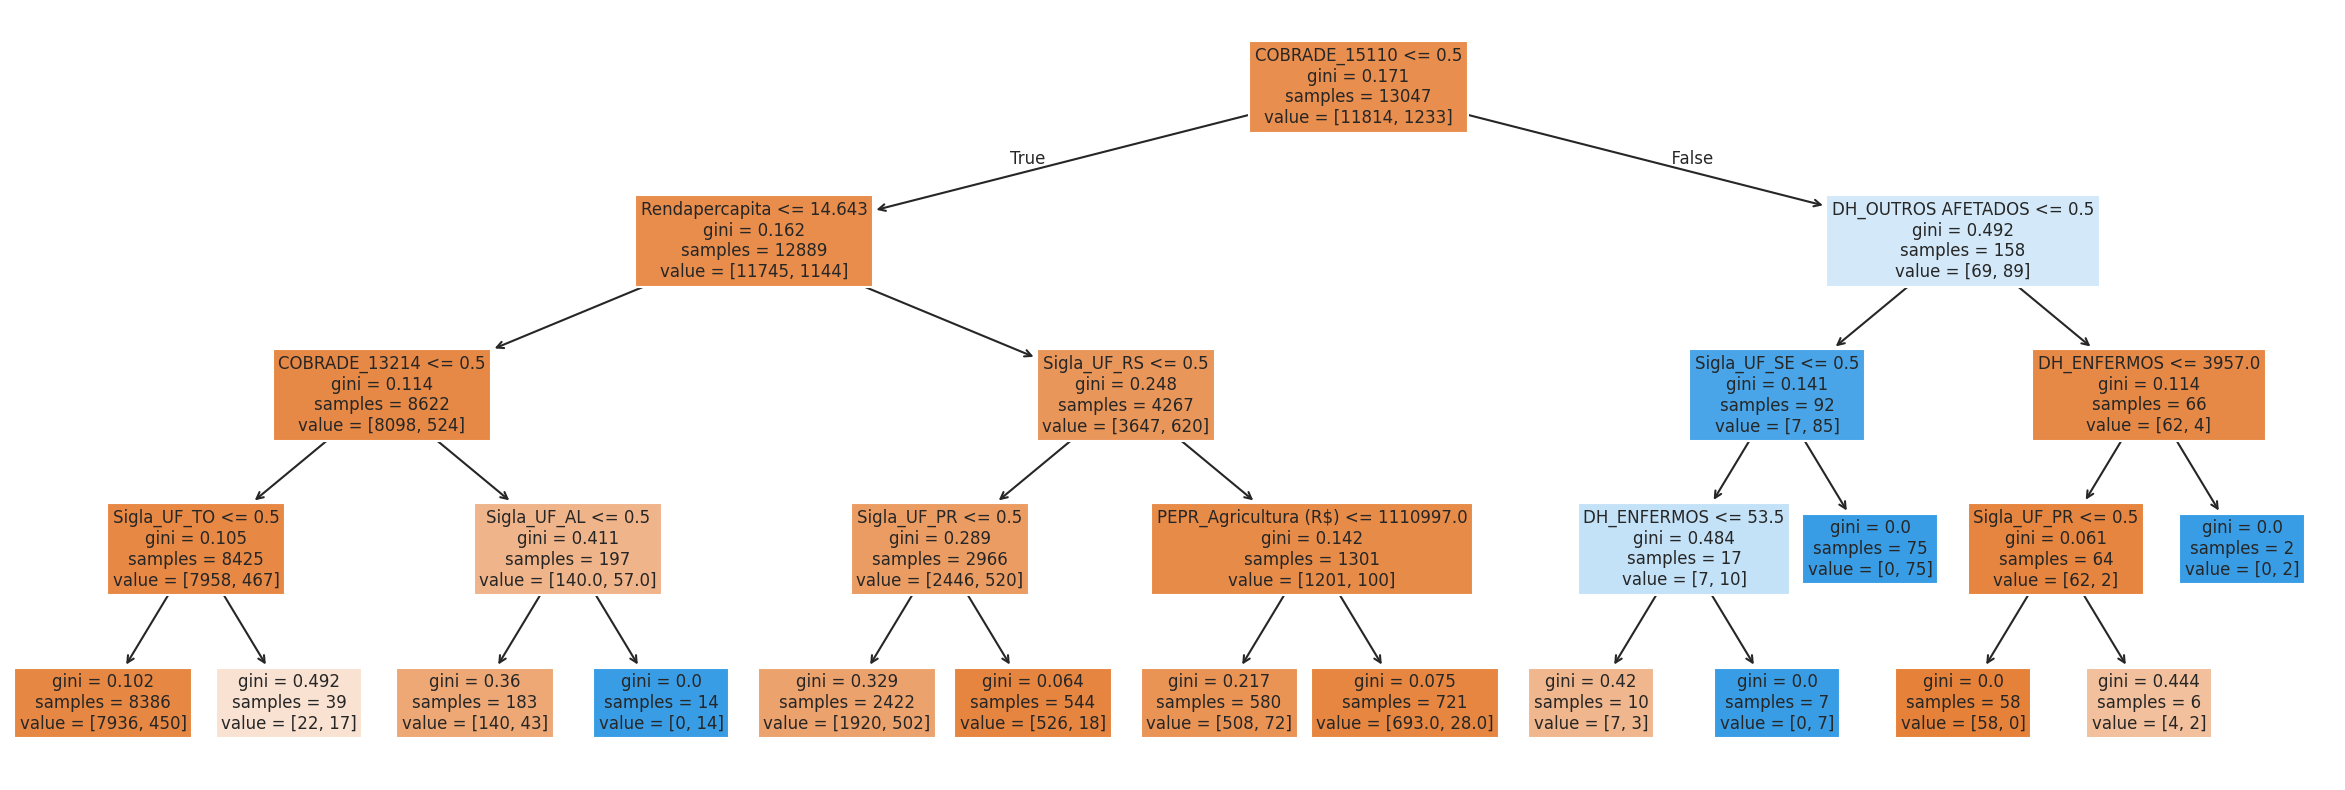

In [12]:
# Criar árvore de decisão e plotar a árvore (plot_tree)
from sklearn.tree import DecisionTreeClassifier, plot_tree

cl = DecisionTreeClassifier(max_depth=4).fit(X, y)

plt.figure(figsize=(30,10))
plot_tree(cl, filled=True, fontsize=12, feature_names=X.columns)
plt.show()

In [13]:
# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Árvore de decisão
clf = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9162196679438058

In [15]:
from sklearn.metrics import f1_score
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1}")

F1-score: 0.8828583080115753


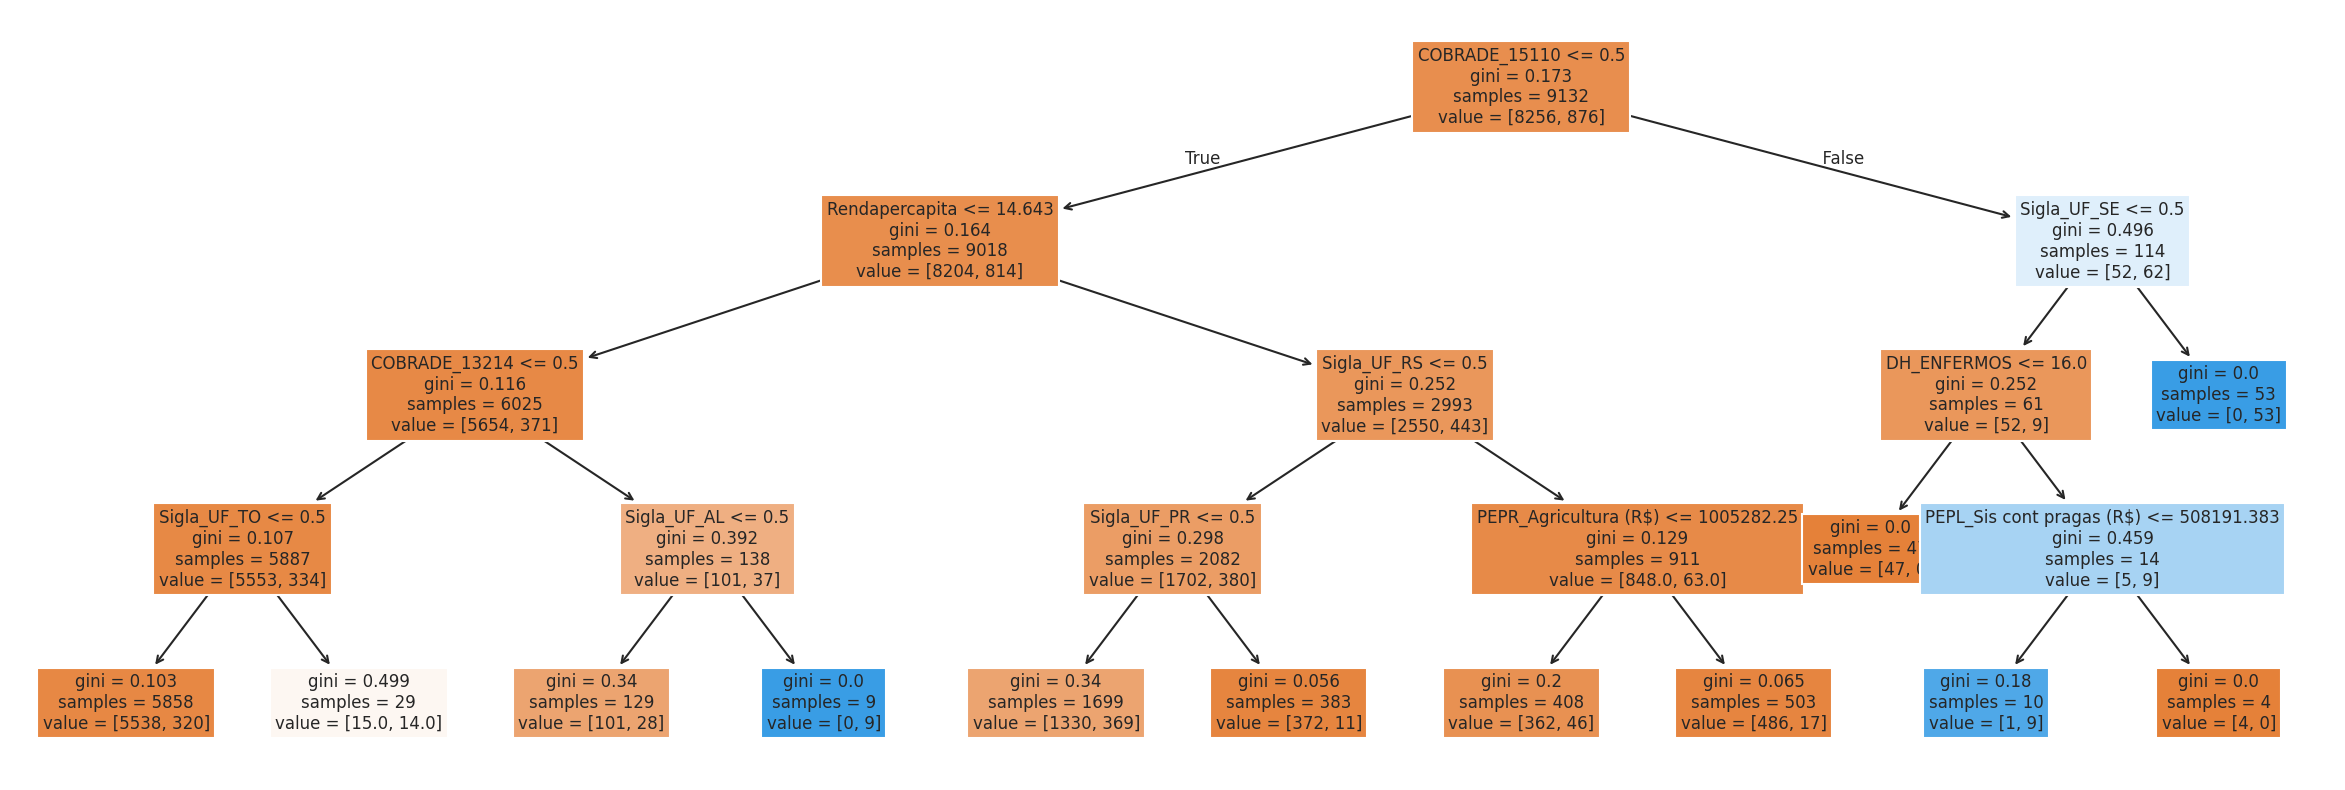

In [16]:
#Mostrar a árvore de decisão
plt.figure(figsize=(30,10))
plot_tree(clf, filled=True, fontsize=12, feature_names=X.columns)
plt.show()

In [17]:
# Regressão Logística
from sklearn.linear_model import LogisticRegression
X_train_no_nan = X_train.dropna()
X_test_no_nan = X_test.dropna()
y_train_no_nan = y_train[X_train_no_nan.index]
y_test_no_nan = y_test[X_test_no_nan.index]

reg_log = LogisticRegression(solver='lbfgs').fit(X_train_no_nan, y_train_no_nan)
reg_log.score(X_test_no_nan, np.ravel(y_test_no_nan))

0.9113584036838066

In [18]:
y_pred_log = reg_log.predict(X_test_no_nan)
f1_log = f1_score(y_test_no_nan, y_pred_log, average='weighted')
print(f"F1-score: {f1_log}")

F1-score: 0.8764038980385982


In [19]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
import numpy as np
rf_class = RandomForestClassifier(n_estimators=120, max_depth=6, random_state=100).fit(X_train, np.ravel(y_train))
rf_class.score(X_test, y_test)

0.9141762452107279

In [20]:
y_pred_r = rf_class.predict(X_test)
f1_r = f1_score(y_test, y_pred_r, average='weighted')
print(f"F1-score: {f1_r}")

F1-score: 0.8779671892448837


###Como encontrar a árvore com o melhor score em uma Random Forest nos dados de teste ?

A árvore com o melhor desempenho é a árvore 7 com um score de 0.9170



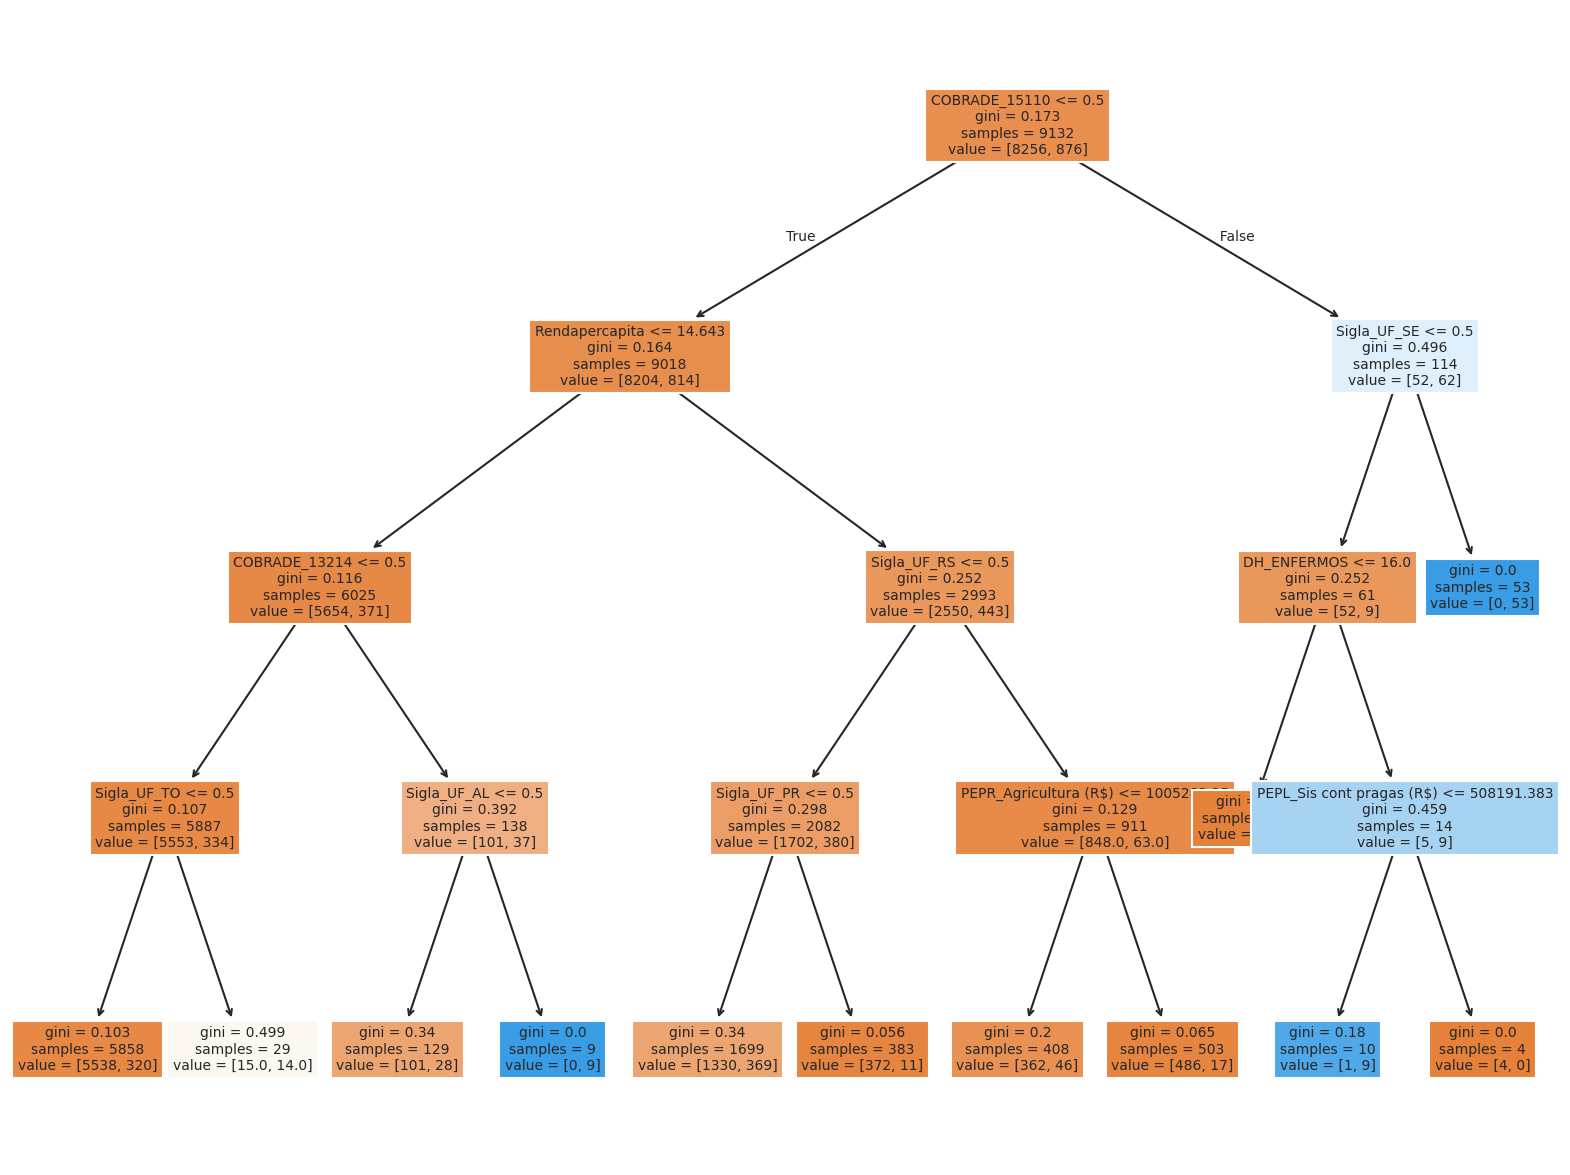

In [21]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Treinar uma Random Forest
rf = RandomForestClassifier(n_estimators=120, max_depth=6, random_state=100)  # Exemplo com 10 árvores
rf.fit(X_train, np.ravel(y_train))

# Avaliar o desempenho de cada árvore individual
best_score = 0
best_tree_index = 0

for i, tree in enumerate(rf.estimators_):
    # Previsão da árvore individual
    y_pred_tree = tree.predict(X_test)

    # Calcular o accuracy score da árvore nos dados de teste
    score = accuracy_score(y_test, np.ravel(y_pred_tree))

    # Encontrar a árvore com o melhor score
    if score > best_score:
        best_score = score
        best_tree_index = i

print(f'A árvore com o melhor desempenho é a árvore {best_tree_index} com um score de {best_score:.4f}\n')

# Acessando a árvore com o melhor desempenho
best_tree = rf.estimators_[best_tree_index]

# Opcional: Visualizar a árvore
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
plot_tree(clf, filled=True, fontsize=10, feature_names=X.columns)
plt.show()


In [22]:
## Usar o treeinterpreter para explicar uma previsão
instance = X_test.iloc[[0]].values #X_test[0].reshape(1, -1)  # Vamos explicar a primeira instância do conjunto de teste
prediction, bias, contributions = ti.predict(clf, instance)

In [23]:
## Passo 6: Visualizar o resultado
# Criar um DataFrame para mostrar a contribuição de cada característica
# Ensure that the feature names and contributions have the same length
# by slicing the feature names to match the length of contributions
num_features = contributions[0].shape[0]

feature_contributions = pd.DataFrame({
    'Feature': X.columns[:num_features],  # Slicing feature names to match contributions length
    'Contribution': contributions[0][:, 1]  # Seleciona a coluna correspondente à classe positiva (1)
})
feature_contributions['Absolute Contribution'] = feature_contributions['Contribution'].abs()

In [24]:
# Ordenar as contribuições pela importância absoluta
feature_contributions = feature_contributions.sort_values(by='Absolute Contribution', ascending=False)

# Mostrar a previsão, o valor de bias e as contribuições
print(f"Previsão do modelo: {prediction[0][1]:.4f}")
print(f"Valor de bias (média): {bias[0][1]:.4f}")
print("\nContribuições das características:")
print(feature_contributions)

Previsão do modelo: 0.0546
Valor de bias (média): 0.0959

Contribuições das características:
                            Feature  Contribution  Absolute Contribution
42                   Rendapercapita         -0.03                   0.03
104                   COBRADE_15110         -0.01                   0.01
94                    COBRADE_13214         -0.00                   0.00
69                      Sigla_UF_TO         -0.00                   0.00
0                         DH_MORTOS          0.00                   0.00
74                    COBRADE_11312          0.00                   0.00
84                    COBRADE_11433          0.00                   0.00
83                    COBRADE_11432          0.00                   0.00
82                    COBRADE_11431          0.00                   0.00
81                    COBRADE_11420          0.00                   0.00
80                    COBRADE_11410          0.00                   0.00
79                    COBRADE_1

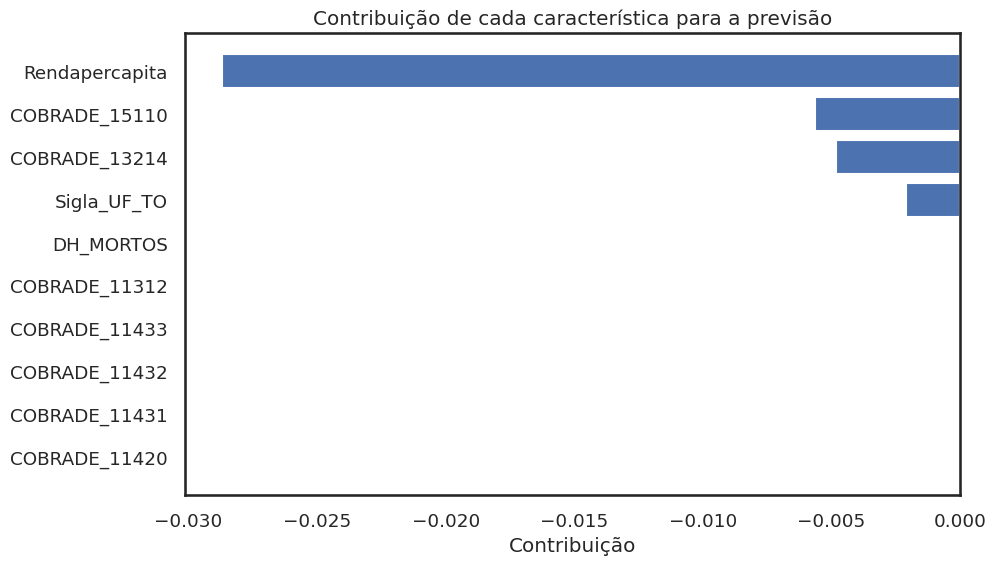

In [25]:
# Visualizar o resultado com um gráfico


plt.figure(figsize=(10, 6))
plt.barh(feature_contributions['Feature'][0:10], feature_contributions['Contribution'][0:10], color='b')
plt.xlabel('Contribuição')
plt.title('Contribuição de cada característica para a previsão')
plt.gca().invert_yaxis()  # Inverter o eixo y para mostrar a maior contribuição no topo
plt.show()